In [8]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import os
os.chdir("/Users/darshmac/Documents/cdac/For DBDA/Advance Analytics/Datasets")

In [2]:
boston = pd.read_csv("Boston.csv")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
X = boston.drop('medv',axis=1)
y = boston['medv']

In [6]:
kfold = KFold(n_splits=5,shuffle=True,random_state=23)

In [7]:
lr = LinearRegression()

In [9]:
result = cross_val_score(lr,X,y,cv=kfold)

In [11]:
print("R2:",np.mean(result))#mean of result is important

R2: 0.7185747399235821


In [18]:
alphas = np.linspace(0.001,15,20)
scores=[]
for v in alphas:
    scr = cross_val_score(lr,X,y,cv=kfold)
    scores.append(np.mean(scr))
    print("Alpha=",v,"R2 =",scr)

Alpha= 0.001 R2 = [0.74514306 0.69363489 0.73264725 0.68377809 0.73767041]
Alpha= 0.790421052631579 R2 = [0.74514306 0.69363489 0.73264725 0.68377809 0.73767041]
Alpha= 1.579842105263158 R2 = [0.74514306 0.69363489 0.73264725 0.68377809 0.73767041]
Alpha= 2.369263157894737 R2 = [0.74514306 0.69363489 0.73264725 0.68377809 0.73767041]
Alpha= 3.158684210526316 R2 = [0.74514306 0.69363489 0.73264725 0.68377809 0.73767041]
Alpha= 3.948105263157895 R2 = [0.74514306 0.69363489 0.73264725 0.68377809 0.73767041]
Alpha= 4.7375263157894745 R2 = [0.74514306 0.69363489 0.73264725 0.68377809 0.73767041]
Alpha= 5.5269473684210535 R2 = [0.74514306 0.69363489 0.73264725 0.68377809 0.73767041]
Alpha= 6.3163684210526325 R2 = [0.74514306 0.69363489 0.73264725 0.68377809 0.73767041]
Alpha= 7.1057894736842115 R2 = [0.74514306 0.69363489 0.73264725 0.68377809 0.73767041]
Alpha= 7.895210526315791 R2 = [0.74514306 0.69363489 0.73264725 0.68377809 0.73767041]
Alpha= 8.68463157894737 R2 = [0.74514306 0.69363489

In [19]:
i_max = np.argmax(scores)
print("Best Alpha:",alphas[i_max])
print("Best Scores:",scores[i_max])

Best Alpha: 0.001
Best Scores: 0.7185747399235821


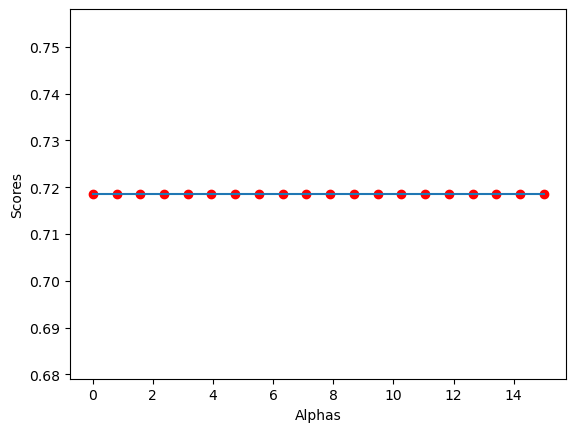

In [20]:
plt.plot(alphas,scores)
plt.scatter(alphas,scores,c='red')
plt.xlabel('Alphas')
plt.ylabel('Scores')
plt.show()

In [21]:
alphas = np.linspace(0.001,15,20)
scores=[]
for v in alphas:
    lasso = Lasso(alpha=v)
    scr = cross_val_score(lasso,X,y,cv=kfold)
    scores.append(np.mean(scr))
    print("Alpha=",v,"R2 =",scr)

Alpha= 0.001 R2 = [0.74545118 0.69331022 0.73295661 0.68354487 0.73764282]
Alpha= 0.790421052631579 R2 = [0.69303539 0.68375648 0.69973486 0.66081088 0.66734739]
Alpha= 1.579842105263158 R2 = [0.61919529 0.64343795 0.64740602 0.63328788 0.60520612]
Alpha= 2.369263157894737 R2 = [0.57925956 0.61562576 0.61705816 0.6077091  0.58067967]
Alpha= 3.158684210526316 R2 = [0.55019968 0.59427212 0.59074084 0.58803499 0.56554245]
Alpha= 3.948105263157895 R2 = [0.53030648 0.56720186 0.567118   0.56405155 0.54969516]
Alpha= 4.7375263157894745 R2 = [0.52505087 0.56492267 0.56120477 0.5528173  0.55158488]
Alpha= 5.5269473684210535 R2 = [0.51904637 0.56190807 0.55469626 0.54408651 0.55260358]
Alpha= 6.3163684210526325 R2 = [0.51228879 0.5581569  0.54760394 0.53461171 0.55274371]
Alpha= 7.1057894736842115 R2 = [0.50479073 0.55367377 0.53992825 0.52439382 0.55200454]
Alpha= 7.895210526315791 R2 = [0.49653975 0.54845889 0.53166916 0.51343285 0.55038605]
Alpha= 8.68463157894737 R2 = [0.49123581 0.54251357

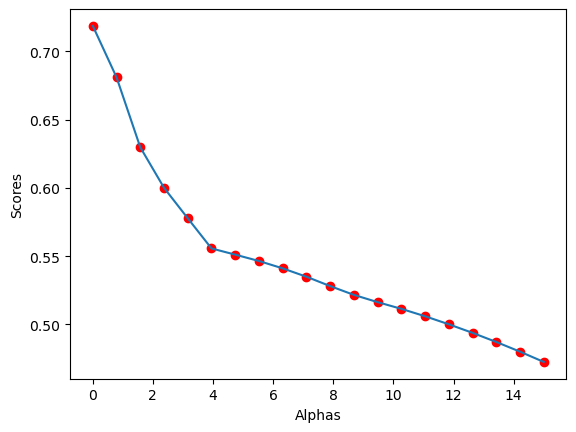

In [22]:
plt.plot(alphas,scores)
plt.scatter(alphas,scores,c='red')
plt.xlabel('Alphas')
plt.ylabel('Scores')
plt.show()

In [26]:
alphas = [0.001,0.1,0.5,1,2]
l1_s = [0.001, 0.25,0.75]
params = []
scores=[]
for v in alphas:
    for l1 in l1_s:
        elas = ElasticNet(alpha=v,l1_ratio=l1)
        scr = cross_val_score(elas,X,y,cv=kfold)
        scores.append(np.mean(scr))
        params.append({'alpha':v,'l1_ratio':l1})
        print("Alpha=",v,"R2 =",np.mean(scr))

Alpha= 0.001 R2 = 0.7183125085042489
Alpha= 0.001 R2 = 0.718475104009807
Alpha= 0.001 R2 = 0.7186442167639503
Alpha= 0.1 R2 = 0.7066051462899191
Alpha= 0.1 R2 = 0.7067805415626843
Alpha= 0.1 R2 = 0.7062913958198893
Alpha= 0.5 R2 = 0.6882659995387922
Alpha= 0.5 R2 = 0.6885697307607141
Alpha= 0.5 R2 = 0.692542155719803
Alpha= 1 R2 = 0.6748313076043034
Alpha= 1 R2 = 0.6730475774515327
Alpha= 1 R2 = 0.6692606160839133
Alpha= 2 R2 = 0.6582271747908262
Alpha= 2 R2 = 0.6516445940476384
Alpha= 2 R2 = 0.6265289567532337


In [27]:
i_max = np.argmax(scores)
print("Best Alpha:",alphas[i_max])
print("Best Scores:",scores[i_max])

Best Alpha: 0.5
Best Scores: 0.7186442167639503


In [32]:
param_values=[d['alpha'] for d in params]
print(len(param_values))
print(len(scores))

15
15


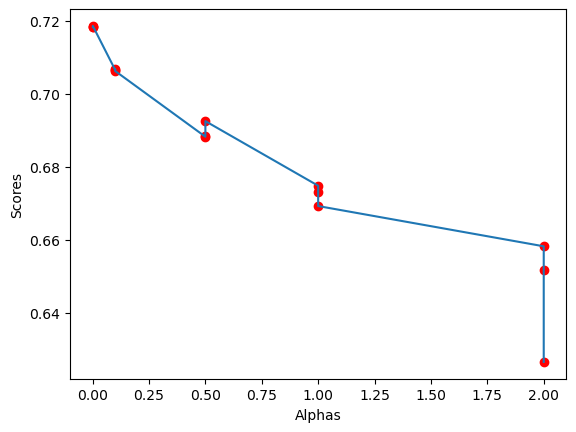

In [33]:
plt.plot(param_values,scores)
plt.scatter(param_values,scores,c='red')
plt.xlabel('Alphas')
plt.ylabel('Scores')
plt.show()